In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import shap

<b> Plot Styles

In [2]:
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.2}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

<b> Load Your Saved Joblib File

In [3]:
loaded_joblib = joblib.load("best-models.joblib")
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'DecisionTreeRegressor'])

<b> Save each object from the loaded_joblib dictionary as a separate variable

In [4]:
preprocessor = loaded_joblib["preprocessor"]
X_train = loaded_joblib["X_train"]
X_test = loaded_joblib["X_test"]
y_train = loaded_joblib["y_train"]
y_test = loaded_joblib["y_test"]
linreg = loaded_joblib["LinearRegression"]
dectree = loaded_joblib["DecisionTreeRegressor"]
dectree

DecisionTreeRegressor(max_depth=5, random_state=42)

<b> Explain your tree-based model with shap

In [5]:
shap.initjs()

In [6]:
len(X_train)

6392

In [7]:
X_shap = shap.sample(X_train,nsamples=1000,random_state=321)
X_shap.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_MISSING,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4469,7.72,1.0,0.074669,76.3986,1987.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4438,5.11,0.0,0.034868,163.8210,2004.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
366,8.05,1.0,0.078386,256.4646,2004.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2219,8.76,0.0,0.050131,128.3336,1999.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6080,6.59,0.0,0.176748,82.7908,1998.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [8]:
# Create the y-shap variable based on the indices of the X-shap data
y_shap = y_train.loc[X_shap.index]
y_shap.head()

4469    1402.1748
4438    2120.5730
366     5153.2920
2219    2556.6720
6080      83.8908
Name: Item_Outlet_Sales, dtype: float64

In [9]:
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)

<b> Create a model explainer

In [10]:
explainer = shap.Explainer(dectree)
explainer

<b> Calculate the shap values for your model.

In [11]:
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [12]:
X_shap.shape

(1000, 32)

<b> Create a summary plot - with plot_type='bar'

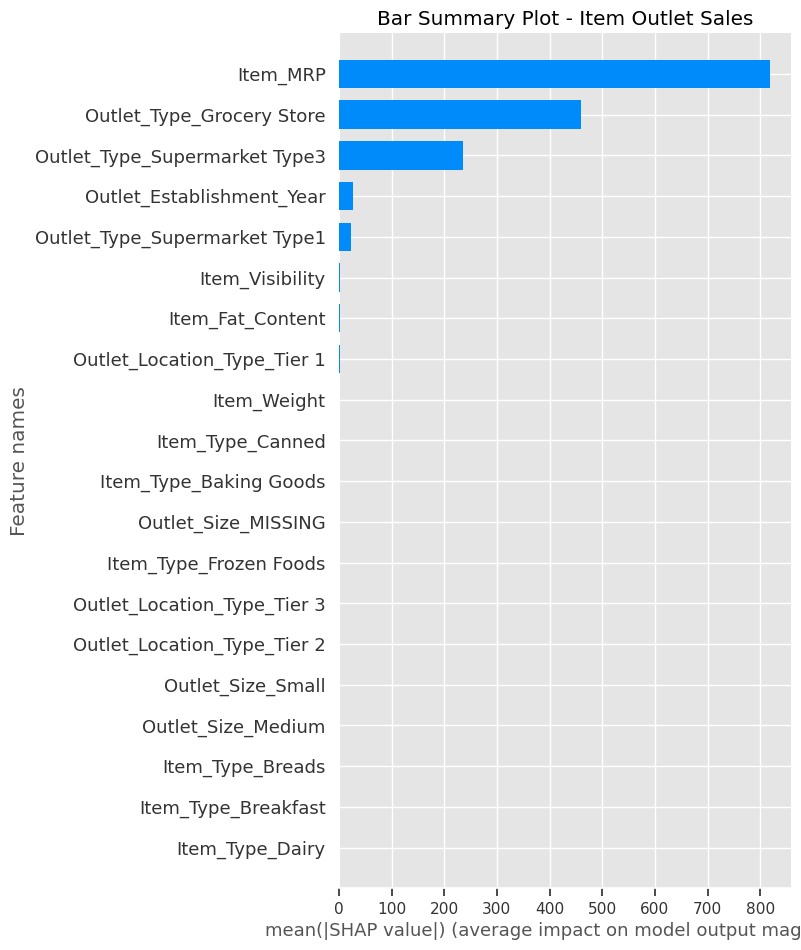

In [13]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, plot_type="bar", show=False)
ax.set_title("Bar Summary Plot - Item Outlet Sales")
ax.set_ylabel("Feature names");

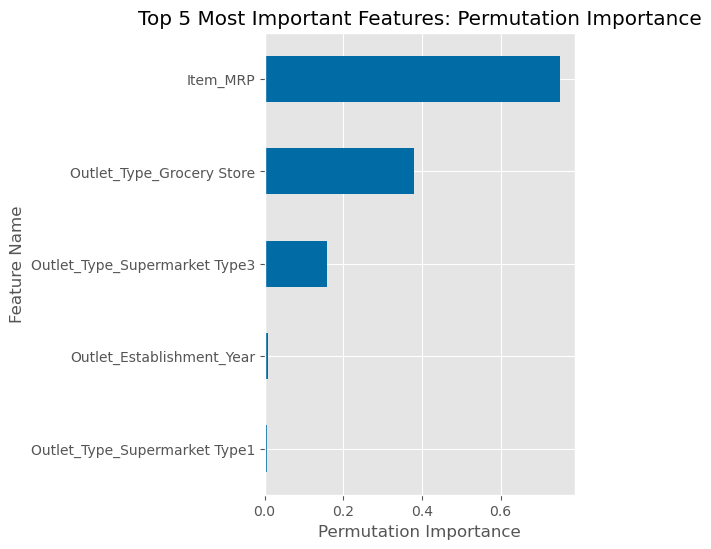

- Are they the same features in both? If not, what's different?

<b> Features are the exact same.

<b> Create a second summary plot - with plot_type='dot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


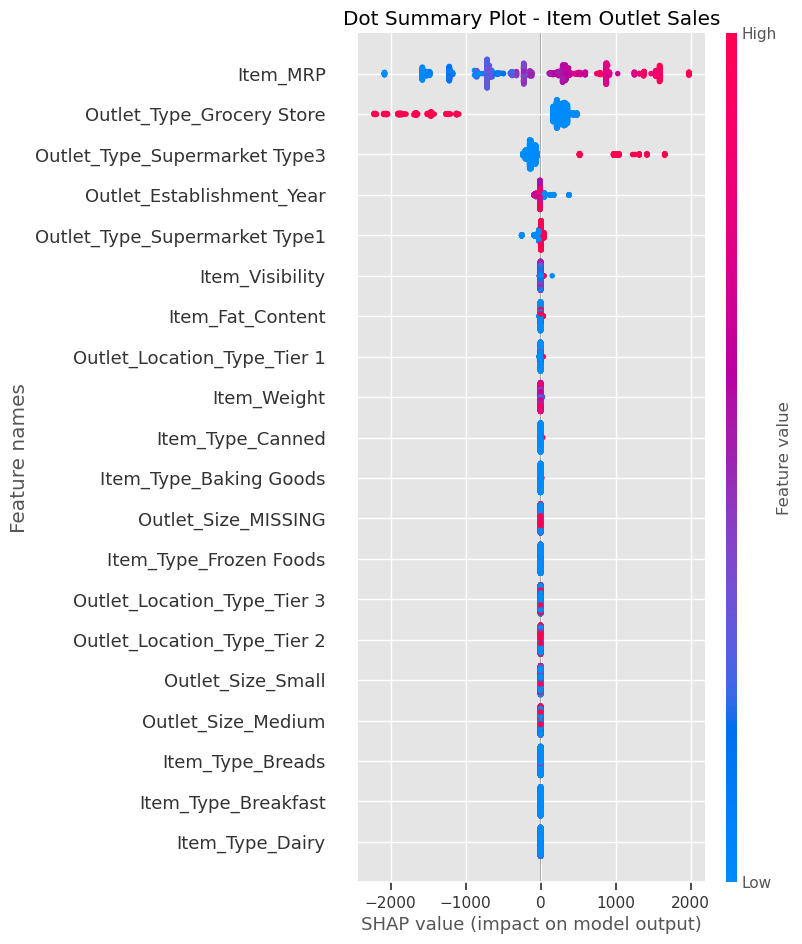

In [14]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap, show=False)
ax.set_title("Dot Summary Plot - Item Outlet Sales")
ax.set_ylabel("Feature names");

- Item_MRP, Outlet_Type_Grocery Store, Outlet_Type_Supermarket Type3 are the most important features.
 
    - If the there is a higher Item MRP the model is likely to predict higher sales
    
    - A grocery store is likley to predict lower sales
    
    - A super market type 3 is likely to predict higher sales

<b> Local Explanations

In [22]:
lowest_price = y_shap[y_shap == y_shap.min()].index[0]
print(f"Least sales sample row: {lowest_price}")
print(f"Least sales sample value: ${y_shap.iloc[lowest_price]}")

Least sales sample row: 178
Least sales sample value: $36.619


In [23]:
highest_price = y_shap[y_shap == y_shap.max()].index[0]
print(f"Highest sales sample row: {highest_price}")
print(f"Highest sales sample value: ${y_shap.iloc[highest_price]}")

Highest sales sample row: 482
Highest sales sample value: $9371.8008


In [24]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer = LimeTabularExplainer(training_data = X_shap.values,
                                      feature_names = X_shap.columns,
                                      mode="regression")
lime_explainer

<b> Least Sales

In [25]:
lime_explainer.explain_instance(X_shap.iloc[lowest_price],
                                dectree.predict).show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


- According to LIME: Outlet Type, Item MRP, and Outlet Type Supermarket were features most heavily influenced the predictions

<b> Highest Sales

In [26]:
lime_explainer.explain_instance(X_shap.iloc[highest_price],
                                dectree.predict).show_in_notebook()

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


- According to LIME: Outlet Type, Item MRP, and Outlet Type Supermarket were features most heavily influenced the predictions

<b> Summary:
    
        - Both the Least Sales and Highest Sales top 3 influential features are the same. 
    
    - In the highest sales, it shows 4 specific features that negatively impact the total sales amount.

<b> Individual Force Plot

<b> Least Sales

In [27]:
shap.force_plot(explainer.expected_value,
                shap_values = shap_values[lowest_price].values,
                features = X_shap.iloc[lowest_price])

- Accoriding to SHAP, Outlet Type Grocery Store and Item MRP provided the greatest influence to sales

<b> Highest Sales

In [28]:
shap.force_plot(explainer.expected_value,
                shap_values = shap_values[highest_price].values,
                features = X_shap.iloc[highest_price])

- Accoriding to SHAP, Outlet Type Grocery Store, outlet type supermarket, and Item MRP provided the greatest influence to sales